In [1]:
import os
import shutil
import sys
import copy
import json
import random
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import mean_squared_error, roc_auc_score, average_precision_score, f1_score
from lifelines.utils import concordance_index
from scipy.stats import pearsonr
import pickle 

import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
torch.manual_seed(2)  
np.random.seed(3)
from prettytable import PrettyTable
import scikitplot as skplt
import matplotlib.pyplot as plt
plt.style.use("ggplot")

print(os.path.abspath('.'))
import warnings
warnings.filterwarnings("ignore")

from DeepPurpose import utils, models, dataset
from DeepPurpose.models import *

/home/gdp/data/DeepPurpose0


In [2]:
#DTC
drug_encoding, target_encoding = 'Daylight', 'AAC'

DTC_sub=pd.read_csv('VAE_data/df_DTC_undrugs_targets.csv')
Smile = DTC_sub['SMILES'].values
Target = DTC_sub['Target_Sequence'].values
y = DTC_sub['Label'].values
train, val, test = utils.data_process(Smile, Target, y,
                                drug_encoding, target_encoding, 
                                split_method='train_full',frac=[0.7,0.1,0.2],
                                random_seed = 1)

print('DTC subset Done!----------------------------------')
#DB
Smile2 = np.load("VAE_data/DB_smiles.npy", allow_pickle=True)
Target2 = np.load("VAE_data/DB_targets.npy", allow_pickle=True)
y2 = np.load("VAE_data/DB_y.npy", allow_pickle=True)
train2, val2, test2 = utils.data_process(Smile2, Target2, y2,
                                drug_encoding, target_encoding, 
                                split_method='random',frac=[0.9,0.1,0.0],
                                random_seed = 1)
print('DB Done!-----------------------------------')

in total: 51863 drug-target pairs
encoding drug...
unique drugs: 6677
drug encoding finished...
encoding protein...
unique target sequence: 766
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.					 Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.
DTC subset Done!----------------------------------
in total: 66434 drug-target pairs
encoding drug...
unique drugs: 10661
drug encoding finished...
encoding protein...
unique target sequence: 1413
-- Encoding AAC takes time. Time Reference: 24s for ~100 sequences in a CPU.					 Calculate your time by the unique target sequence #, instead of the entire dataset.
protein encoding finished...
splitting dataset...
Done.
DB Done!-----------------------------------


In [3]:
#val = train2.sample(frac = 0.1, replace = False, random_state = 1)
predict2 = train

In [4]:
config = utils.generate_config(drug_encoding ='Daylight', 
                         target_encoding = 'AAC', 
                         train_epoch = 100, 
                         LR = 0.001, 
                         batch_size = 512)

Let's use 1 GPU!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 36.2723. Total time 0.0 hours
Training at Epoch 1 iteration 100 with loss 1.05952. Total time 0.00638 hours
Validation at Epoch 1 , MSE: 1.06245 , Pearson Correlation: 0.62733 with p-value: 0.0 , Concordance Index: 0.76347
Training at Epoch 2 iteration 0 with loss 1.13581. Total time 0.00861 hours
Training at Epoch 2 iteration 100 with loss 1.07311. Total time 0.015 hours
Validation at Epoch 2 , MSE: 1.07243 , Pearson Correlation: 0.67172 with p-value: 0.0 , Concordance Index: 0.78058
EarlyStopping counter: 1 out of 10
Training at Epoch 3 iteration 0 with loss 1.01399. Total time 0.01722 hours
Training at Epoch 3 iteration 100 with loss 1.24919. Total time 0.02388 hours
Validation at Epoch 3 , MSE: 0.93522 , Pearson Correlation: 0.69078 with p-value: 0.0 , Concordance Index: 0.78914
Training at Epoch 4 iteration 0 with loss 0.99153. Total time 0.02583 hours
Training at Epoch 4 it

Training at Epoch 29 iteration 100 with loss 0.51526. Total time 0.23333 hours
Validation at Epoch 29 , MSE: 0.61625 , Pearson Correlation: 0.80683 with p-value: 0.0 , Concordance Index: 0.84553
Training at Epoch 30 iteration 0 with loss 0.59251. Total time 0.235 hours
Training at Epoch 30 iteration 100 with loss 0.44174. Total time 0.24111 hours
Validation at Epoch 30 , MSE: 0.60954 , Pearson Correlation: 0.80800 with p-value: 0.0 , Concordance Index: 0.84445
Training at Epoch 31 iteration 0 with loss 0.54628. Total time 0.24277 hours
Training at Epoch 31 iteration 100 with loss 0.47614. Total time 0.24888 hours
Validation at Epoch 31 , MSE: 0.60660 , Pearson Correlation: 0.80917 with p-value: 0.0 , Concordance Index: 0.84491
Training at Epoch 32 iteration 0 with loss 0.49892. Total time 0.25055 hours
Training at Epoch 32 iteration 100 with loss 0.45826. Total time 0.25638 hours
Validation at Epoch 32 , MSE: 0.60649 , Pearson Correlation: 0.80737 with p-value: 0.0 , Concordance Index:

Validation at Epoch 57 , MSE: 0.57669 , Pearson Correlation: 0.81974 with p-value: 0.0 , Concordance Index: 0.85478
EarlyStopping counter: 4 out of 10
Training at Epoch 58 iteration 0 with loss 0.42480. Total time 0.45861 hours
Training at Epoch 58 iteration 100 with loss 0.39165. Total time 0.46472 hours
Validation at Epoch 58 , MSE: 0.56410 , Pearson Correlation: 0.82749 with p-value: 0.0 , Concordance Index: 0.85833
EarlyStopping counter: 5 out of 10
Training at Epoch 59 iteration 0 with loss 0.33897. Total time 0.46638 hours
Training at Epoch 59 iteration 100 with loss 0.39797. Total time 0.4725 hours
Validation at Epoch 59 , MSE: 0.56850 , Pearson Correlation: 0.82843 with p-value: 0.0 , Concordance Index: 0.85723
EarlyStopping counter: 6 out of 10
Training at Epoch 60 iteration 0 with loss 0.36335. Total time 0.47416 hours
Training at Epoch 60 iteration 100 with loss 0.38369. Total time 0.48027 hours
Validation at Epoch 60 , MSE: 0.56772 , Pearson Correlation: 0.82701 with p-valu

Training at Epoch 85 iteration 0 with loss 0.25934. Total time 0.67333 hours
Training at Epoch 85 iteration 100 with loss 0.32237. Total time 0.67972 hours
Validation at Epoch 85 , MSE: 0.54364 , Pearson Correlation: 0.83425 with p-value: 0.0 , Concordance Index: 0.86205
EarlyStopping counter: 4 out of 10
Training at Epoch 86 iteration 0 with loss 0.31742. Total time 0.68166 hours
Training at Epoch 86 iteration 100 with loss 0.39913. Total time 0.68777 hours
Validation at Epoch 86 , MSE: 0.53218 , Pearson Correlation: 0.83611 with p-value: 0.0 , Concordance Index: 0.86490
EarlyStopping counter: 5 out of 10
Training at Epoch 87 iteration 0 with loss 0.37860. Total time 0.68972 hours
Training at Epoch 87 iteration 100 with loss 0.42721. Total time 0.69555 hours
Validation at Epoch 87 , MSE: 0.52400 , Pearson Correlation: 0.83667 with p-value: 0.0 , Concordance Index: 0.86897
EarlyStopping counter: 6 out of 10
Training at Epoch 88 iteration 0 with loss 0.26642. Total time 0.6975 hours
Tra

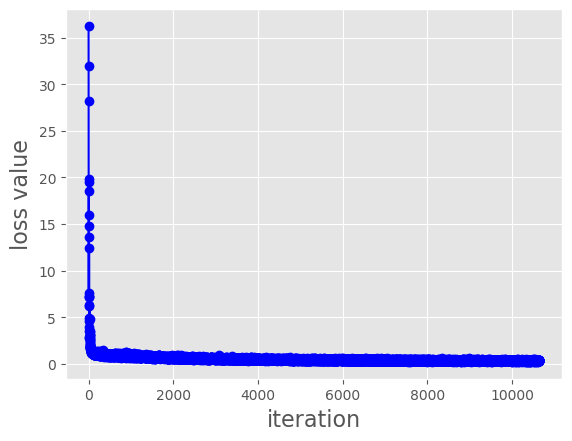

In [5]:
model = models.model_initialize(**config)
model.train(train2, val2, predict2)

In [6]:
model.save_model('./db-dtc-day-aac-original')